# **2017 Full-field Data, Treatment II**
***Objective:* produce a mask that will allow working with the lazurite particles only while ignoring contributions from the background**

## Treatment IIa:
***Objective:* produce a mean image from UN-normalized full-field XANES spectral cubes**

### Program: 
[Jupyter notebook] (Python 3)

### Input: 
- UN-normalized full-field XANES spectral cubes, type = .h5, [dataset21] ()
> 600Vpow_1.h5

### Steps:
- follow script below

### Output:
- mean images, type = .png [dataset23] ()
> mean_value_600Vpow_1_'date'.png

### Notes:
- all comments are made with '##' 
- aspects that can be changed depending on the sample, etc. are with '#'

### Additional Notes:
- 600 V sample had less contrast after normalization thus used UN-normalized spectral cube to make the mean image from which to them make the mask

In [31]:
## enter today's date
date = '2019date'

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import tables
from scipy import ndimage
import skimage.measure 
import imageio
import numpy as np
import pandas as pd
import os
import scipy.misc
import matplotlib.pyplot as plt 

In [4]:
##standards for figures

SMALL_SIZE = 24
MEDIUM_SIZE = 24
BIGGER_SIZE = 24

s=100
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Start here for each new file import...

In [5]:
pwd

'C:\\Users\\Presentatie\\Desktop\\ALESSA_XANES\\01_iPython_notebooks\\Manscript_stripped_sheets'

Change directory below to where full field files are located...

In [7]:
cd ..

C:\Users\Presentatie\Desktop\ALESSA_XANES\01_iPython_notebooks


In [8]:
cd /Users/Presentatie/Desktop/ALESSA_XANES/07_manuscript/figures_2019version/dataset_21/

C:\Users\Presentatie\Desktop\ALESSA_XANES\07_manuscript\figures_2019version\dataset_21


In [9]:
figsize(16, 16)

In [10]:
##import un-normalized H-600 file

filename = '600Vpow_1.h5'  ##for 600 C sample

h5 = tables.open_file(filename)

In [19]:
##preparation for saving
basename, ext = os.path.splitext(filename)
basename, ext

('600Vpow_1', '.h5')

In [17]:
##for 600 C file only (for other samples, see other sheet)
h_data = h5.root.detector0['sample']
data = h_data['data']
data.shape

(2146, 1794, 140)

In [18]:
##want energy axis first (all other samples had this arrangement already)
dat = data[:]  #to make it an array that can be reshaped
data_600 = dat.transpose(2, 0, 1)
data_600.shape
#data_600.dtype

(140, 2146, 1794)

(2146, 1794)


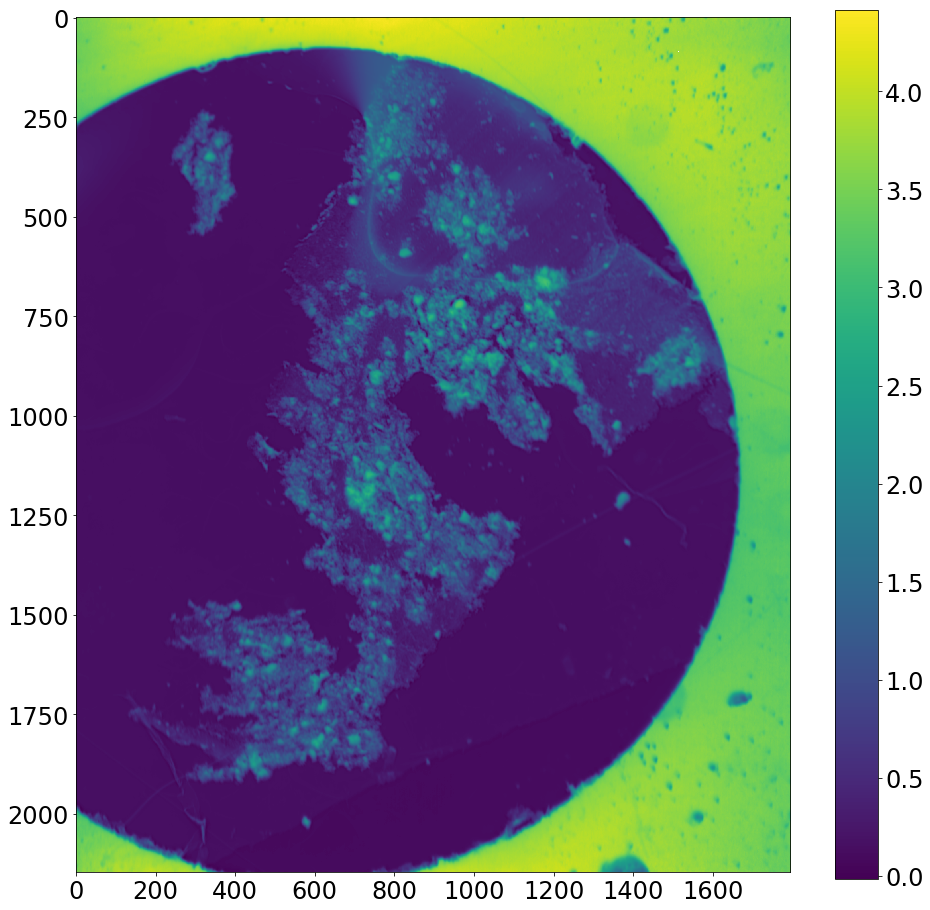

In [20]:
##calculates the mean intensity over all energies and displays as an image
mn = data_600.mean(axis=0)
print(mn.shape)
imshow(mn)
colorbar()

In [21]:
##the min and max mean intensity
np.nanmin(mn), np.nanmax(mn) ##to skip NaNs

(-0.017733186, 4.4154043)

Change directory to where you want to save mean images

In [22]:
pwd

'C:\\Users\\Presentatie\\Desktop\\ALESSA_XANES\\07_manuscript\\figures_2019version\\dataset_21'

In [23]:
cd ..

C:\Users\Presentatie\Desktop\ALESSA_XANES\07_manuscript\figures_2019version


In [24]:
cd /Users/Presentatie/Desktop/ALESSA_XANES/07_manuscript/figures_2019version/dataset_23

C:\Users\Presentatie\Desktop\ALESSA_XANES\07_manuscript\figures_2019version\dataset_23


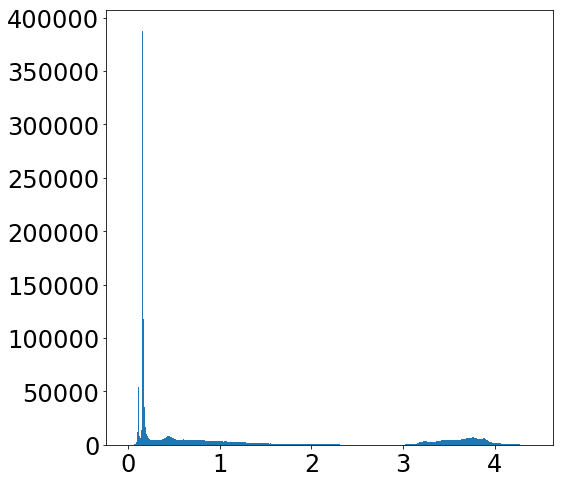

In [25]:
##making a histogram for all pixels
figsize(8, 8)

##need 1D data, can run this...
#hist(mn.reshape(-1), 1000)  ##this reshapes array to be 1D for histogram array

##or this...
hist(mn[~isnan(mn)], 1000); ##boolean slices automatically becomes one dimension

In [26]:
##this should output 1
##note: ptp is max - min

test = ((mn - np.nanmin(mn))/(np.nanmax(mn)-np.nanmin(mn)))
np.nanmax(test)  ##using .max() with .nanmax() does not work

1.0

In [30]:
##preparation for 8-bit RGB image
colors = uint8(255 * cm.viridis(((mn - np.nanmin(mn))/(np.nanmax(mn)-np.nanmin(mn))))[...,:3])
#colors.shape
colors.max(axis=(0,1))

C:\Users\Presentatie\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


array([253, 231, 142], dtype=uint8)

In [33]:
##save mean image as a .png from which to create mask
imageio.imwrite
imsave('mean_value_' + basename + '_' + date + '.png', colors)

### continue to sheet '05_2017FF_Treatment-IIb...'